## Capstone Project: EDA Notebook

Author: Uldis Knox

Date: December 11th, 2022

## Table of Contents

1. [Drop & Reorder Columns](#http://localhost:8888/notebooks/Desktop/Capstone/Capstone%20EDA.ipynb#Drop-Columns) <br>
2. [Data Cleaning](#http://localhost:8888/notebooks/Desktop/Capstone/Capstone%20EDA.ipynb#Data-Cleaning) <br>
3. [Merge Data](#http://localhost:8888/notebooks/Desktop/Capstone/Capstone%20EDA.ipynb#Merge-Additional-Data) <br>
4. [Data Analysis](#http://localhost:8888/notebooks/Desktop/Capstone/Capstone%20EDA.ipynb#Data-Analysis) <br>

---

**Import Packages**

In [1]:
#Import our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load our data
df = pd.read_csv('data/beer_reviews.csv')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
#check the shape of our data
df.shape

(1586614, 13)

In [5]:
#print a statement describing the shape of our data.
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataset has 1586614 rows and 13 columns.


## Drop Columns

In [6]:
#drop columns that we do not need for our project
df.drop(df.columns[[0, 2]], axis=1, inplace=True)

We are only dropping two (2) columns from our original dataset, 'brewery_id' and 'review_time'. All other columns are important to the project.

In [8]:
#check dataframe
df.head()

,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [9]:
#reorder columns
df_beer = df[['brewery_name', 'beer_beerid','beer_name', 'beer_style', 'beer_abv', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_profilename']]

df_beer.head()

,brewery_name,beer_beerid,beer_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename
0,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,stcules
1,Vecchio Birraio,48213,Red Moon,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,stcules
2,Vecchio Birraio,48215,Black Horse Black Beer,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,stcules
3,Vecchio Birraio,47969,Sausa Pils,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,stcules
4,Caldera Brewing Company,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,johnmichaelsen


Our dataframe is now ready to be cleaned.

## Data Cleaning

In [10]:
#check for null values
df_beer.isnull().sum()

brewery_name             15
beer_beerid               0
beer_name                 0
beer_style                0
beer_abv              67785
review_overall            0
review_aroma              0
review_appearance         0
review_palate             0
review_taste              0
review_profilename      348
dtype: int64

Brewery name is an important field for us, so we will need to find those values. beer_abv is not important, but a useful bit of information to have in our dataframe, we will most likely just populate these null values with the mean of the column or rows above and/or below them.

review_profilename is a key feature for our recommender system, but we need to have a profile name to be able to run the recommender system, we will drop these values.

In [11]:
#drop null values from review_profilename
df_beer.dropna(subset=['review_profilename'],inplace=True)

In [12]:
#check for null values again
df_beer.isnull().sum()

brewery_name             15
beer_beerid               0
beer_name                 0
beer_style                0
beer_abv              67773
review_overall            0
review_aroma              0
review_appearance         0
review_palate             0
review_taste              0
review_profilename        0
dtype: int64

We have removed the missing values from our 'review_profilename' column and can move on to addressing the rest of the null values in our dataset.

In [13]:
#check for the missing values in Brewery Name column
df[df['brewery_name'].isna()]

,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,NaN,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,NaN,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,NaN,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,NaN,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,NaN,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,NaN,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,NaN,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,NaN,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,NaN,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,NaN,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


Notice that we also have some additional text in the 'beer_name' column, indicating that the wrong brewery has been entered. We will clean up this text once we have imputed the correct values into the 'brewery_name' column.

In [16]:
#Since we know the index position of the 15 missing values, we will use .at() to populate the missing values.
#We will find the missing values by using google and the Beer Name and other identifiers in the Beer Name column.

df_beer.at[651565,'brewery_name']='Engel Brauerei'
df_beer.at[659293,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659299,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659300,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659301,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659302,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659303,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659304,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[659305,'brewery_name']='Crailsheimer Engelbräu'
df_beer.at[1391043,'brewery_name']='American Brewing Company'
df_beer.at[1391049,'brewery_name']='City Brewing Company'
df_beer.at[1391050,'brewery_name']='City Brewing Company'
df_beer.at[1391051,'brewery_name']='Fixed Gear Brewing Co'
df_beer.at[1391052,'brewery_name']='Fixed Gear Brewing Co'
df_beer.at[1391053,'brewery_name']='American Brewing Company '

In [17]:
#Recheck to make sure the nulls have been removed from Brewery Name
df_beer.isnull().sum()

brewery_name              0
beer_beerid               0
beer_name                 0
beer_style                0
beer_abv              67773
review_overall            0
review_aroma              0
review_appearance         0
review_palate             0
review_taste              0
review_profilename        0
dtype: int64

We have addressed all the null/NaN values in our dataset except for the 'beer_abv' column, before we take care of this, we will clean up the text in the 'beer_name' column for those rows that included text about the wrong brewery.

In [18]:
#We saw that the Beer Name column for the Brewery Name NaN values had more text than the beer name,
#We will clean up these values as well

df_beer.at[651565,'beer_name']='Engel Tyrolian Bräu'
df_beer.at[659293,'beer_name']='Engel Bock Dunkel'
df_beer.at[659299,'beer_name']='Engel Gold'
df_beer.at[659300,'beer_name']='Engel Landbier'
df_beer.at[659301,'beer_name']='Engel Keller Hell'
df_beer.at[659302,'beer_name']='Engel Aloisius'
df_beer.at[659303,'beer_name']='Engel Keller Dunkel'
df_beer.at[659304,'beer_name']='Engel Keller Dunkel'
df_beer.at[659305,'beer_name']='Engel Keller Dunkel'

In [19]:
#We know we still have missing values in the beer_abv column, 67,785 of them.
#We are not going to be using beer_abv as an independent variable to begin out modeling, so we will populate
#our missing values with the mean of the beer_abv column.
#Check for our mean
mean_value =df_beer['beer_abv'].mean()

In [20]:
#Fill in our missing values with our mean for beer_abv
df_beer['beer_abv'].fillna(int(df_beer['beer_abv'].mean()), inplace=True)
df_beer

,brewery_name,beer_beerid,beer_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename
0,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,stcules
1,Vecchio Birraio,48213,Red Moon,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,stcules
2,Vecchio Birraio,48215,Black Horse Black Beer,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,stcules
3,Vecchio Birraio,47969,Sausa Pils,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,stcules
4,Caldera Brewing Company,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,johnmichaelsen
...,...,...,...,...,...,...,...,...,...,...,...
1586609,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,5.2,5.0,4.0,3.5,4.0,4.0,maddogruss
1586610,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,5.2,4.0,5.0,2.5,2.0,4.0,yelterdow
1586611,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,5.2,4.5,3.5,3.0,3.5,4.0,TongoRad
1586612,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,5.2,4.0,4.5,4.5,4.5,4.5,dherling


In [21]:
#Check our null/NaN values again to make sure we have addressed all the missing values
df_beer.isna().sum()

brewery_name          0
beer_beerid           0
beer_name             0
beer_style            0
beer_abv              0
review_overall        0
review_aroma          0
review_appearance     0
review_palate         0
review_taste          0
review_profilename    0
dtype: int64

Our dataframe is showing no null/NaN values and we are ready to proceed with our testing and modeling.

We have found a brewery name that is actually the beer name, this will need to be updated.
'Brew Eyed' in brewery name needs to to be changed to 'Bo Bristle Brewing Company' and
'Growler Craft Brewery' needs to be updated to 'Virginia Growler Company at George's Market'.

We determined this by going to the website and searching for the review_profile name and looking at their reviews. A little manual data analysis but it can be important for your dataframe to keep as many values as possible, rather than outright dropping values we find that are not correct. 

More time spent on data cleaning and pre-processing can save a lot of time later in the project.

In [22]:
df_beer.at[2382,'brewery_name']='Virginia Growler Company'
df_beer.at[2384,'brewery_name']='Virginia Growler Company'
df_beer.at[2385,'brewery_name']='Virginia Growler Company'
df_beer.at[2386,'brewery_name']='Virginia Growler Company'
df_beer.at[2387,'brewery_name']='Virginia Growler Company'
df_beer.at[2338,'brewery_name']='Bo Bristle Brewing Company'
df_beer.at[2339,'brewery_name']='Bo Bristle Brewing Company'
df_beer.at[2340,'brewery_name']='Bo Bristle Brewing Company'

Our primary dataframe is cleaned up, but we want to merge some additional data into this dataframe that was scraped from the internet. Specifically we are going to add location data (city and country in separate columns) as well as tasting notes or profile descriptions for each beer type in the dataset. After we merge though, we did discover that in the "brewery_name" column we have some erronious values, entries that are not a brewery name or location, such as "On Tap", we will be dropping these rows to complete our primary dataframe we will use for modelling. Copies of the .csv files where the additional data was collected will be included in the zip file with the final submission of the project and details of where the data came from will be included in the intro and data dictionary at the beginning of the EDA notebook.

## Merge Additional Data

In [23]:
#Load our location data csv file as additional dataframe.
df_city = pd.read_csv('data/brewery_location.csv')
df_city.head()

,brewery,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Brewery,City,Country
1,0.0,Vecchio Birraio,Campo San Martino PD,Italy
2,1.0,Caldera Brewing Company,"Ashland, OR",USA
3,2.0,Amstel Brouwerij B. V.,Amsterdam,Netherlands
4,3.0,Broad Ripple Brew Pub,"Indianapolis, IN",USA


In [24]:
#We need to drop our first row and rename our columns appropriately.
df_city.drop(df_city.columns[[0]], axis=1, inplace=True)
df_city.drop([0], axis=0, inplace=True)

In [25]:
#rename our columns
df_city.columns = ['brewery_name', 'city', 'country']
df_city.head()

,brewery_name,city,country
1,Vecchio Birraio,Campo San Martino PD,Italy
2,Caldera Brewing Company,"Ashland, OR",USA
3,Amstel Brouwerij B. V.,Amsterdam,Netherlands
4,Broad Ripple Brew Pub,"Indianapolis, IN",USA
5,Moon River Brewing Company,"Savannah, GA",USA


Our location dataframe is now ready to be merged with our primary dataframe. We will now prepare our tasting profiles dataframe for merging with our primary dataframe.

In [27]:
#load our tast profiles csv file as an additional dataframe
df_taste = pd.read_csv('data/beer_taste.csv')
df_taste.head()

,Unnamed: 0,beer_style,taste
0,0,Hefeweizen,sweet and fruity with notes of banana and clov...
1,1,English Strong Ale,"Malty-sweet with fruity esters, often with a c..."
2,2,Foreign / Export Stout,"roasted grain and malt flavor with a coffee, c..."
3,3,German Pilsener,"bitter taste, malty sweetness, floral hop aroma"
4,4,American Double / Imperial IPA,"floral, citrus, stone fruit, spicy, pine/resin..."


In [28]:
#Drop our first column as it is a duplicate of the index column
df_taste.drop(df_taste.columns[[0]], axis=1, inplace=True)
df_taste.head()

,beer_style,taste
0,Hefeweizen,sweet and fruity with notes of banana and clov...
1,English Strong Ale,"Malty-sweet with fruity esters, often with a c..."
2,Foreign / Export Stout,"roasted grain and malt flavor with a coffee, c..."
3,German Pilsener,"bitter taste, malty sweetness, floral hop aroma"
4,American Double / Imperial IPA,"floral, citrus, stone fruit, spicy, pine/resin..."


Our tasting profile/notes dataframe is ready to be merged with our primary dataframe.

In [29]:
#Make a copy of our primary dataframe to begin, then merge in our location data.

df_merge = df_beer.copy()
df_merge.head()

,brewery_name,beer_beerid,beer_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename
0,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,stcules
1,Vecchio Birraio,48213,Red Moon,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,stcules
2,Vecchio Birraio,48215,Black Horse Black Beer,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,stcules
3,Vecchio Birraio,47969,Sausa Pils,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,stcules
4,Caldera Brewing Company,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,johnmichaelsen


In [30]:
df2 = pd.merge(left = df_merge, right = df_city, how = "left", left_on = "brewery_name", right_on = "brewery_name")

In [31]:
#check our new dataframe to see if the merge worked correctly
df2.head()

,brewery_name,beer_beerid,beer_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename,city,country
0,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,stcules,Campo San Martino PD,Italy
1,Vecchio Birraio,48213,Red Moon,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,stcules,Campo San Martino PD,Italy
2,Vecchio Birraio,48215,Black Horse Black Beer,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,stcules,Campo San Martino PD,Italy
3,Vecchio Birraio,47969,Sausa Pils,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,stcules,Campo San Martino PD,Italy
4,Caldera Brewing Company,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,johnmichaelsen,"Ashland, OR",USA


In [32]:
#Merge our tasting profile dataframe with the dataframe we just created above with our city and country data
df3 = pd.merge(left = df2, right = df_taste, how = "left", left_on = "beer_style", right_on = "beer_style")

In [33]:
#check our dataframe for proper merge.
df3.head()

,brewery_name,beer_beerid,beer_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename,city,country,taste
0,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,stcules,Campo San Martino PD,Italy,sweet and fruity with notes of banana and clov...
1,Vecchio Birraio,48213,Red Moon,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,stcules,Campo San Martino PD,Italy,"Malty-sweet with fruity esters, often with a c..."
2,Vecchio Birraio,48215,Black Horse Black Beer,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,stcules,Campo San Martino PD,Italy,"roasted grain and malt flavor with a coffee, c..."
3,Vecchio Birraio,47969,Sausa Pils,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,stcules,Campo San Martino PD,Italy,"bitter taste, malty sweetness, floral hop aroma"
4,Caldera Brewing Company,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,johnmichaelsen,"Ashland, OR",USA,"floral, citrus, stone fruit, spicy, pine/resin..."


In [34]:
#reorder columns
df_brew = df3[['brewery_name', 'city', 'country','beer_beerid', 'beer_name', 'beer_style', 'taste', 'beer_abv', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_profilename']]
df_brew.head()

,brewery_name,city,country,beer_beerid,beer_name,beer_style,taste,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename
0,Vecchio Birraio,Campo San Martino PD,Italy,47986,Sausa Weizen,Hefeweizen,sweet and fruity with notes of banana and clov...,5.0,1.5,2.0,2.5,1.5,1.5,stcules
1,Vecchio Birraio,Campo San Martino PD,Italy,48213,Red Moon,English Strong Ale,"Malty-sweet with fruity esters, often with a c...",6.2,3.0,2.5,3.0,3.0,3.0,stcules
2,Vecchio Birraio,Campo San Martino PD,Italy,48215,Black Horse Black Beer,Foreign / Export Stout,"roasted grain and malt flavor with a coffee, c...",6.5,3.0,2.5,3.0,3.0,3.0,stcules
3,Vecchio Birraio,Campo San Martino PD,Italy,47969,Sausa Pils,German Pilsener,"bitter taste, malty sweetness, floral hop aroma",5.0,3.0,3.0,3.5,2.5,3.0,stcules
4,Caldera Brewing Company,"Ashland, OR",USA,64883,Cauldron DIPA,American Double / Imperial IPA,"floral, citrus, stone fruit, spicy, pine/resin...",7.7,4.0,4.5,4.0,4.0,4.5,johnmichaelsen


We now have merged all of our dataframes together into our final, primary dataframe. There is just a little bit more cleaning to be done. Several more of the "brewery_name" values were not entered as a brewery name, but as something else that is not useful to us, like "On Tap". We will be dropping these rows before we begin modelling.

This was discovered during the web scraping and manual data collection for the brewery location (city and country) from a list of our unique breweries in the original dataset.

In [36]:
#Drop rows containing the erronious values in the 'brewery_name' category.
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Stakhanovitz'].index, inplace=True)

In [37]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Oktoberfest'].index, inplace=True)

In [38]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Heiner Brau'].index, inplace=True)

In [39]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']==''].index, inplace=True)

In [40]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Traditional Scottish Ales'].index, inplace=True)

In [41]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Beer Works'].index, inplace=True)

In [42]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=="Big Daddy's"].index, inplace=True)

In [43]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='B.A.R.T.S.'].index, inplace=True)

In [44]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='AB Group, Ltd.'].index, inplace=True)

In [45]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Four + Brewing Company'].index, inplace=True)

In [46]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Independent Liquor'].index, inplace=True)

In [47]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Slopes Restaurant & Brewpub'].index, inplace=True)

In [48]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Keeer'].index, inplace=True)

In [49]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='MT Brewery'].index, inplace=True)

In [50]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Real Beer'].index, inplace=True)

In [51]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Craft Brewing Company'].index, inplace=True)

In [52]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Craft Microbrewery'].index, inplace=True)

In [53]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='On Tap'].index, inplace=True)

In [54]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=='Shoes Brewery'].index, inplace=True)

In [55]:
df_brew.drop(df_brew.loc[df_brew['brewery_name']=="Brewhouse,The"].index, inplace=True)

In [56]:
#Run a sanity check to make sure values from above have been removed, run a few times on different values

df_brew[df_brew.eq("Craft Microbrewery").any(1)]

,brewery_name,city,country,beer_beerid,beer_name,beer_style,taste,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename


In [57]:
#check the shape of our dataframe after dropping rows that contain the erronious brewery_name values
df_brew.shape

(1585072, 14)

In [58]:
#print a statement describing the shape of our data.
print(f'Our dataset has {df_brew.shape[0]} rows and {df_brew.shape[1]} columns.')

Our dataset has 1585072 rows and 14 columns.


Our output above, compared to our original shape when we loaded our primary dataframe shows that we only dropped a few thousand rows, and we have one more column (14) than our original dataset (13) after data collecting and merging. We will now export our completed dataframe as a .csv file before moving forward with EDA.

In [59]:
df_brew.to_csv('capstone.csv', index=False )

With our dataframe exported, we will continue with some additional EDA, looking at the distribution of our data, correlation significance between columns, etc. and then we will move to a new notebook to begin our logistic regression modelling.

## Data Analysis

In [61]:
#Check for total unique beers in the dataframe
style = df['beer_style'].unique()

In [62]:
#the above cell would produce a hard to read array output, we are going to capture that in a series
#for readability
style1 = pd.Series(style)
style1

0                           Hefeweizen
1                   English Strong Ale
2               Foreign / Export Stout
3                      German Pilsener
4       American Double / Imperial IPA
                    ...               
99                              Gueuze
100                               Gose
101                           Happoshu
102                              Sahti
103    Bière de Champagne / Bière Brut
Length: 104, dtype: object

We have a total of 104 unique beer styles in our dataframe.

In [64]:
brew = df['brewery_name'].unique()

In [65]:
brewery = pd.Series(brew)
brewery

0                    Vecchio Birraio
1            Caldera Brewing Company
2             Amstel Brouwerij B. V.
3              Broad Ripple Brew Pub
4         Moon River Brewing Company
                    ...             
5738           Gattopardo Cervejaria
5739            Brauerei Lasser GmbH
5740           Wissey Valley Brewery
5741         Outback Brewery Pty Ltd
5742    Georg Meinel Bierbrauerei KG
Length: 5743, dtype: object

We have 5,743 unique breweries in our dataframe.

In [66]:
# total customers
customers=df_brew['review_profilename'].nunique()
# total beers by style
beer_style=df_brew['beer_style'].nunique()
# total beers by Id
beer_Id=df_brew['beer_beerid'].nunique()

original="The dataset has {} customers,".format(customers), "{} styles of beer,".format(beer_style), "and {} beers".format(beer_Id)
print (original)

('The dataset has 33380 customers,', '104 styles of beer,', 'and 65833 beers')


From above, while we know our datafrom is ~1.58 million rows, we can see that only 65833 beers have been reviewed, so we have multiple reviews for each 'beer_id' in our data. We also have a much smaller set of users/reviewers of the site that have reviewed a lot of beers each.

While this may seem like we would have duplicates in our data, for the purpose of our project, even if a reviewer has review one beer multiple times, their reviews can change depending if they had the beer on tap, on tap at the brewery, from a can or bottle, etc. Each review is statistically significant, as they all add to the overall review of that beer. 

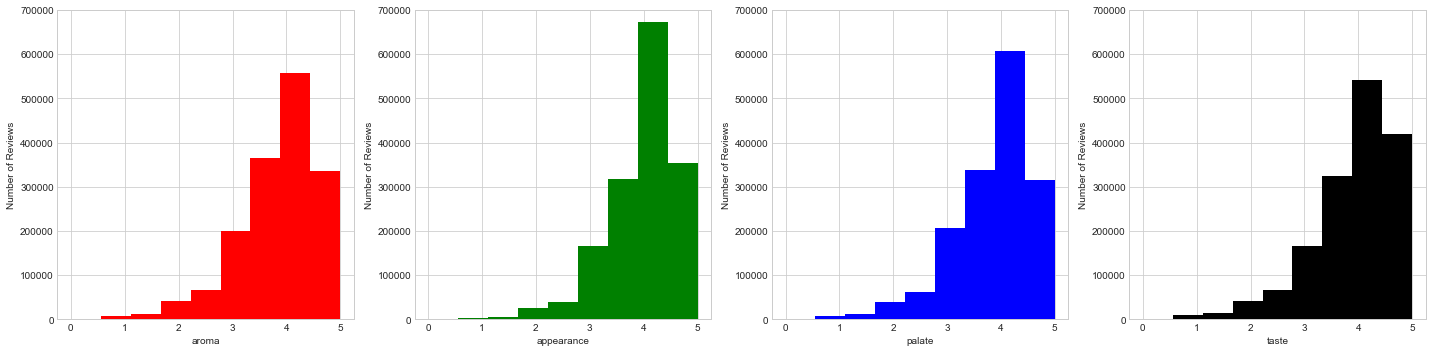

In [67]:
#We will look at the distributions for our ranking data

plt.style.use('seaborn-whitegrid')
reviews = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']
beer_reviews = df_brew[reviews].dropna(axis=1)
beer_reviews.head()

fig, ax = plt.subplots(ncols=4, figsize = (20,5))
colors = ['r', 'g', 'b', 'k', 'm']
for idx, head in enumerate(reviews[1:]):
    plt.subplot(1, len(reviews[1:]), idx+1)
    plt.ylim(0,7e+05)
    plt.xlabel(head.split('_')[1])
    plt.ylabel('Number of Reviews')
    plt.hist(beer_reviews[head], bins=np.linspace(0, 5, 10), color=colors[idx])
plt.tight_layout(h_pad=1.0)

We can see from our output above that we have left-skewed data for all of our numeric rating columns, with all four (4) histograms indicating that the majority of ratings fall in a ~3.8-4.5 range.

This is good information to have as we will need to scale our data during our modeling portion of the project to ensure our minority class gets proper respresentation.

The above is also not uncommon when it comes to reviewing and rating beer; my experience is that most people that take the time to review beers on any platform (ratebeer, beeradvocate, untappd, etc) usually only rate beers they like/prefer and do not rate beers they did not like.

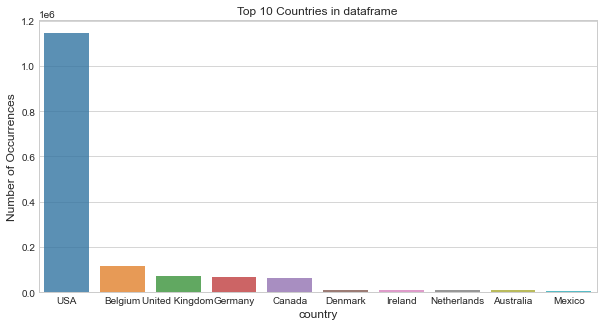

In [68]:
# Plotting a bar graph of the top 10 countries in our dataframe
country_count = df_brew['country'].value_counts()
country_count = country_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(country_count.index, country_count.values, alpha=0.8)
plt.title('Top 10 Countries in dataframe')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('country', fontsize=12)
plt.show()

We can see that by far, the USA is the most represented country in our dataset. This shouldn't have a strong influence on our modelling as the city and country are primarily for creating maps and as outputs for the recommender system, not an independent variable being used on our feature or target variable.


In [69]:
# Number of beer reviews grouped by style of beer
num_beers_by_style=df_brew.groupby('beer_style').agg({'beer_name':'nunique','beer_beerid':'nunique'})
num_beers_by_style.reset_index(inplace=True)
num_beers_by_style = num_beers_by_style.rename(columns={'beer_name': 'total_beers', 'beer_beerid': 'total_beers_Id'})
num_beers_by_style.sort_values(by=['total_beers_Id'], ascending=False).head()


,beer_style,total_beers,total_beers_Id
12,American IPA,3162,3604
14,American Pale Ale (APA),2877,3336
2,American Amber / Red Ale,2224,2502
17,American Porter,1836,2194
60,Fruit / Vegetable Beer,1597,1827


We see that four (4) of our top five (5) beers contain "American" in the name of the beer style. This is not surprising given that the USA is by far the most represented country in our dataframe. It also does not mean our data or modeling will be skewed towards 'american' style beers. These just happen to be four (4) of the top five (5) beers reviewed.

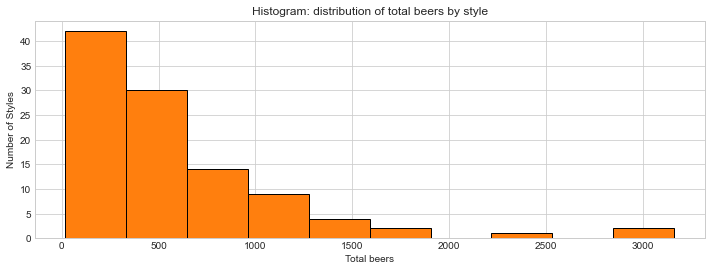

In [72]:
#histogram plot of our total beers by style
fig = plt.figure(figsize=(12,4))

sns.distplot(num_beers_by_style["total_beers"], bins=50, kde=False).set_title('Histogram: total beers by style')

plt.hist(num_beers_by_style["total_beers"], bins=10,  alpha=1, histtype='bar', ec='black')
plt.ylabel('Number of Styles')
plt.xlabel('Total beers')
plt.title(r'Histogram: distribution of total beers by style')
plt.show()

In [71]:
#Top 5 beers by style in the dataframe, by percentage
top5_beers_by_style=num_beers_by_style.sort_values(by=['total_beers_Id'], ascending=False).head(5)
top5_beers_by_style['percentage']=top5_beers_by_style.total_beers_Id/top5_beers_by_style.total_beers_Id.sum()*100
top5_beers_by_style.sort_values(by=['percentage'], ascending=False).head()
pd.options.display.float_format = '{:,.0f}'.format
top5_beers_by_style


,beer_style,total_beers,total_beers_Id,percentage
12,American IPA,3162,3604,27
14,American Pale Ale (APA),2877,3336,25
2,American Amber / Red Ale,2224,2502,19
17,American Porter,1836,2194,16
60,Fruit / Vegetable Beer,1597,1827,14


Our top 5 by percentage is the same as our top 5 by beer_id, not surprised with this result.

In [73]:
#look at the most reviewed beers by style
most_rated_style=df_brew.groupby('beer_style').agg({'review_profilename':'nunique'})
most_rated_style.reset_index(inplace=True)
most_rated_style = most_rated_style.rename(columns={'review_profilename': 'total_reviews'})
most_rated_style.sort_values(by=['total_reviews'], ascending=False).head()

,beer_style,total_reviews
12,American IPA,12480
9,American Double / Imperial IPA,10976
14,American Pale Ale (APA),9250
89,Russian Imperial Stout,8990
17,American Porter,8461


When we look at most reviewed by beer_style, we notice that we still have 3 of the top 5 from the beer style by total beers, but our list now includes two (2) new beers that have more reviews than in our previous list. 

In [74]:
#Find the top 5 styles of beer by percentage of reviews/customers
top5_styles_by_customer=most_rated_style.sort_values(by=['total_reviews'], ascending=False).head(5)
top5_styles_by_customer['percentage']=top5_styles_by_customer.total_reviews/top5_styles_by_customer.total_reviews.sum()*100
top5_styles_by_customer.sort_values(by=['percentage'], ascending=False).head(5)
pd.options.display.float_format = '{:,.0f}'.format
top5_styles_by_customer

,beer_style,total_reviews,percentage
12,American IPA,12480,25
9,American Double / Imperial IPA,10976,22
14,American Pale Ale (APA),9250,18
89,Russian Imperial Stout,8990,18
17,American Porter,8461,17


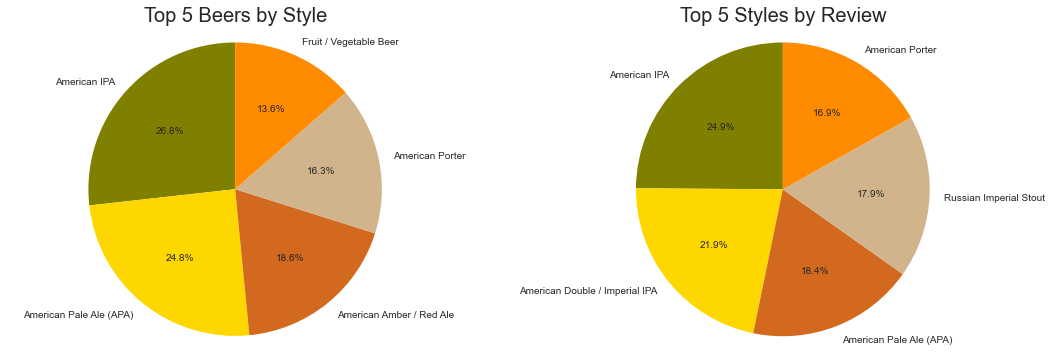

In [75]:
#plotting the top 5 beers by style and by review for comparison
f, (ax1, ax2) = plt.subplots(1, 2)
labels = top5_beers_by_style['beer_style']
sizes = top5_beers_by_style['percentage']
labels2 = top5_styles_by_customer['beer_style']
sizes2 = top5_styles_by_customer['percentage']
colors = ['olive', 'gold', 'chocolate', 'tan', 'darkorange']

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')
ax1.set_title('Top 5 Beers by Style',fontsize=20)
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.axis('equal') 
ax2.set_title('Top 5 Styles by Review',fontsize=20)

fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()


**Conclusion:**  We have worked our way through loading our data, merging in additional data, cleaning our dataframe and exporting it for use in additional workbooks.  From there we began analyzing our dataframe, parsing through it to examine different columns and performing comparison analysis with grouping data together.

We will move forward from EDA to begin modeling our data